In [3]:
import pandas as pd
import csv
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df=pd.read_csv("CSV_data/statisticalFeatures.csv",index_col=False)
df

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,arrhythmia
0,-0.485,0.780,-0.225085,0.311210,0.046189,0.214915,0.096852,0.780,1.265,2.506346,3.074325,10.443485,2.989125,5.714250,0.096852,0.149888,2.989125,3.074325,10.443485,N
1,-0.300,0.580,-0.065254,0.193244,0.033085,0.181893,0.037343,0.580,0.880,3.001388,2.229329,4.541907,0.268512,2.203250,0.037343,0.006220,0.268512,2.229329,4.541907,N
2,-0.535,0.875,-0.287321,0.328626,0.025442,0.159506,0.107995,0.875,1.410,2.662598,5.357950,31.927254,24.188103,31.642625,0.107995,1.989414,24.188103,5.357950,31.927254,N
3,-0.360,0.495,-0.195085,0.217213,0.009123,0.095516,0.047182,0.495,0.855,2.278867,4.390390,25.940657,11.151077,13.824200,0.047182,0.422811,11.151077,4.390390,25.940657,N
4,-0.570,0.940,-0.332586,0.373395,0.028811,0.169737,0.139424,0.940,1.510,2.517442,5.195860,31.453586,32.299052,40.711725,0.139424,3.558928,32.299052,5.195860,31.453586,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202227,-0.080,0.645,0.070060,0.119058,0.009267,0.096263,0.014175,0.645,0.725,5.417510,3.096847,14.943577,1.236901,3.572075,0.014175,0.006681,1.236901,3.096847,14.943577,N
202228,-0.430,1.540,-0.199652,0.357333,0.087826,0.296354,0.127687,1.540,1.970,4.309710,4.267919,19.429201,9.726030,31.155525,0.127687,0.440789,9.726030,4.267919,19.429201,N
202229,-0.125,0.710,0.034180,0.115790,0.012239,0.110630,0.013407,0.710,0.835,6.131778,3.398698,16.723278,0.306280,3.271400,0.013407,0.001584,0.306280,3.398698,16.723278,N
202230,-0.350,1.670,-0.156886,0.344409,0.094005,0.306602,0.118618,1.670,2.020,4.848883,4.426384,20.349437,5.808689,27.993775,0.118618,0.206838,5.808689,4.426384,20.349437,N


In [5]:
channel2=df.iloc[1::2]
channel2

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,arrhythmia
1,-0.300,0.580,-0.065254,0.193244,0.033085,0.181893,0.037343,0.580,0.880,3.001388,2.229329,4.541907,0.268512,2.203250,0.037343,0.006220,0.268512,2.229329,4.541907,N
3,-0.360,0.495,-0.195085,0.217213,0.009123,0.095516,0.047182,0.495,0.855,2.278867,4.390390,25.940657,11.151077,13.824200,0.047182,0.422811,11.151077,4.390390,25.940657,N
5,-0.470,0.705,-0.230445,0.263620,0.016390,0.128025,0.069495,0.705,1.175,2.674306,3.854563,22.465985,15.506658,20.292650,0.069495,0.820723,15.506658,3.854563,22.465985,N
7,-0.425,0.655,-0.231919,0.267289,0.017657,0.132879,0.071443,0.655,1.080,2.450534,4.060978,22.115247,15.275346,20.289875,0.071443,0.819144,15.275346,4.060978,22.115247,N
9,-0.395,0.545,-0.235474,0.257889,0.011059,0.105160,0.066506,0.545,0.940,2.113316,4.348770,25.013723,15.802639,18.954350,0.066506,0.872739,15.802639,4.348770,25.013723,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202223,-0.080,0.775,0.083071,0.143982,0.013830,0.117602,0.020731,0.775,0.855,5.382605,3.469099,16.323332,1.663072,4.996150,0.020731,0.012764,1.663072,3.469099,16.323332,N
202225,-0.105,0.655,0.079177,0.133370,0.011519,0.107325,0.017788,0.655,0.760,4.911136,2.273350,9.430717,1.523365,4.322400,0.017788,0.010974,1.523365,2.273350,9.430717,N
202227,-0.080,0.645,0.070060,0.119058,0.009267,0.096263,0.014175,0.645,0.725,5.417510,3.096847,14.943577,1.236901,3.572075,0.014175,0.006681,1.236901,3.096847,14.943577,N
202229,-0.125,0.710,0.034180,0.115790,0.012239,0.110630,0.013407,0.710,0.835,6.131778,3.398698,16.723278,0.306280,3.271400,0.013407,0.001584,0.306280,3.398698,16.723278,N


In [6]:
new_names = [f'{col}2' for col in channel2.columns]
channel2.columns = new_names
channel2

,MIN2,MAX2,MEAN2,RMS2,VAR2,STD2,POWER2,PEAK2,P2P2,CREST FACTOR2,SKEW2,KURTOSIS2,MAX_f2,SUM_f2,MEAN_f2,VAR_f2,PEAK_f2,SKEW_f2,KURTOSIS_f2,arrhythmia2
1,-0.300,0.580,-0.065254,0.193244,0.033085,0.181893,0.037343,0.580,0.880,3.001388,2.229329,4.541907,0.268512,2.203250,0.037343,0.006220,0.268512,2.229329,4.541907,N
3,-0.360,0.495,-0.195085,0.217213,0.009123,0.095516,0.047182,0.495,0.855,2.278867,4.390390,25.940657,11.151077,13.824200,0.047182,0.422811,11.151077,4.390390,25.940657,N
5,-0.470,0.705,-0.230445,0.263620,0.016390,0.128025,0.069495,0.705,1.175,2.674306,3.854563,22.465985,15.506658,20.292650,0.069495,0.820723,15.506658,3.854563,22.465985,N
7,-0.425,0.655,-0.231919,0.267289,0.017657,0.132879,0.071443,0.655,1.080,2.450534,4.060978,22.115247,15.275346,20.289875,0.071443,0.819144,15.275346,4.060978,22.115247,N
9,-0.395,0.545,-0.235474,0.257889,0.011059,0.105160,0.066506,0.545,0.940,2.113316,4.348770,25.013723,15.802639,18.954350,0.066506,0.872739,15.802639,4.348770,25.013723,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202223,-0.080,0.775,0.083071,0.143982,0.013830,0.117602,0.020731,0.775,0.855,5.382605,3.469099,16.323332,1.663072,4.996150,0.020731,0.012764,1.663072,3.469099,16.323332,N
202225,-0.105,0.655,0.079177,0.133370,0.011519,0.107325,0.017788,0.655,0.760,4.911136,2.273350,9.430717,1.523365,4.322400,0.017788,0.010974,1.523365,2.273350,9.430717,N
202227,-0.080,0.645,0.070060,0.119058,0.009267,0.096263,0.014175,0.645,0.725,5.417510,3.096847,14.943577,1.236901,3.572075,0.014175,0.006681,1.236901,3.096847,14.943577,N
202229,-0.125,0.710,0.034180,0.115790,0.012239,0.110630,0.013407,0.710,0.835,6.131778,3.398698,16.723278,0.306280,3.271400,0.013407,0.001584,0.306280,3.398698,16.723278,N


In [7]:
channel2.reset_index(drop=True,inplace=True)
df=df.drop(df.index[1::2])
df.reset_index(drop=True,inplace=True)
df

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,arrhythmia
0,-0.485,0.780,-0.225085,0.311210,0.046189,0.214915,0.096852,0.780,1.265,2.506346,3.074325,10.443485,2.989125,5.714250,0.096852,0.149888,2.989125,3.074325,10.443485,N
1,-0.535,0.875,-0.287321,0.328626,0.025442,0.159506,0.107995,0.875,1.410,2.662598,5.357950,31.927254,24.188103,31.642625,0.107995,1.989414,24.188103,5.357950,31.927254,N
2,-0.570,0.940,-0.332586,0.373395,0.028811,0.169737,0.139424,0.940,1.510,2.517442,5.195860,31.453586,32.299052,40.711725,0.139424,3.558928,32.299052,5.195860,31.453586,N
3,-0.645,0.960,-0.344665,0.385523,0.029833,0.172724,0.148628,0.960,1.605,2.490126,5.300222,32.825849,33.737582,42.210275,0.148628,3.991217,33.737582,5.300222,32.825849,N
4,-0.565,0.860,-0.322140,0.361479,0.026893,0.163990,0.130667,0.860,1.425,2.379114,5.270049,31.195586,29.575706,37.240150,0.130667,3.056593,29.575706,5.270049,31.195586,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101111,-0.435,1.615,-0.187905,0.369002,0.100854,0.317575,0.136162,1.615,2.050,4.376675,4.134956,18.226935,8.509258,32.815075,0.136162,0.374478,8.509258,4.134956,18.226935,N
101112,-0.365,1.725,-0.167407,0.361284,0.102501,0.320158,0.130526,1.725,2.090,4.774637,4.443616,20.285046,6.810133,31.717850,0.130526,0.269974,6.810133,4.443616,20.285046,N
101113,-0.410,1.680,-0.224365,0.367100,0.084423,0.290556,0.134762,1.680,2.090,4.576412,4.656214,22.853097,12.685602,33.960100,0.134762,0.683844,12.685602,4.656214,22.853097,N
101114,-0.430,1.540,-0.199652,0.357333,0.087826,0.296354,0.127687,1.540,1.970,4.309710,4.267919,19.429201,9.726030,31.155525,0.127687,0.440789,9.726030,4.267919,19.429201,N


In [8]:
channel2.to_csv("channel2.csv",index=False)
df.to_csv("firstChannel.csv",index=False)

In [9]:
multiselectedFeatures=pd.concat([df,channel2],ignore_index=True,axis=1)
multiselectedFeatures.columns=df.columns.tolist()+channel2.columns.tolist()
multiselectedFeatures

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,...,SKEW2,KURTOSIS2,MAX_f2,SUM_f2,MEAN_f2,VAR_f2,PEAK_f2,SKEW_f2,KURTOSIS_f2,arrhythmia2
0,-0.485,0.780,-0.225085,0.311210,0.046189,0.214915,0.096852,0.780,1.265,2.506346,...,2.229329,4.541907,0.268512,2.203250,0.037343,0.006220,0.268512,2.229329,4.541907,N
1,-0.535,0.875,-0.287321,0.328626,0.025442,0.159506,0.107995,0.875,1.410,2.662598,...,4.390390,25.940657,11.151077,13.824200,0.047182,0.422811,11.151077,4.390390,25.940657,N
2,-0.570,0.940,-0.332586,0.373395,0.028811,0.169737,0.139424,0.940,1.510,2.517442,...,3.854563,22.465985,15.506658,20.292650,0.069495,0.820723,15.506658,3.854563,22.465985,N
3,-0.645,0.960,-0.344665,0.385523,0.029833,0.172724,0.148628,0.960,1.605,2.490126,...,4.060978,22.115247,15.275346,20.289875,0.071443,0.819144,15.275346,4.060978,22.115247,N
4,-0.565,0.860,-0.322140,0.361479,0.026893,0.163990,0.130667,0.860,1.425,2.379114,...,4.348770,25.013723,15.802639,18.954350,0.066506,0.872739,15.802639,4.348770,25.013723,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101111,-0.435,1.615,-0.187905,0.369002,0.100854,0.317575,0.136162,1.615,2.050,4.376675,...,3.469099,16.323332,1.663072,4.996150,0.020731,0.012764,1.663072,3.469099,16.323332,N
101112,-0.365,1.725,-0.167407,0.361284,0.102501,0.320158,0.130526,1.725,2.090,4.774637,...,2.273350,9.430717,1.523365,4.322400,0.017788,0.010974,1.523365,2.273350,9.430717,N
101113,-0.410,1.680,-0.224365,0.367100,0.084423,0.290556,0.134762,1.680,2.090,4.576412,...,3.096847,14.943577,1.236901,3.572075,0.014175,0.006681,1.236901,3.096847,14.943577,N
101114,-0.430,1.540,-0.199652,0.357333,0.087826,0.296354,0.127687,1.540,1.970,4.309710,...,3.398698,16.723278,0.306280,3.271400,0.013407,0.001584,0.306280,3.398698,16.723278,N


In [10]:
multiselectedFeatures.drop(["arrhythmia"],axis=1,inplace=True)
multiselectedFeatures.rename(columns={"arrhythmia2":"arrhytmia"},inplace=True)
multiselectedFeatures.to_csv("multiselectedFeatures.csv",index=False)

In [11]:
hasNull=multiselectedFeatures.isnull().any(axis=1)
nullIndices=multiselectedFeatures.index[hasNull]
print(f"DataFrame has {df.isnull().sum().sum()} null values")
print(f"Rows with null values: {nullIndices.tolist()}")

DataFrame has 0 null values
Rows with null values: []


In [12]:
features=multiselectedFeatures.select_dtypes(include=["number"])
variance=VarianceThreshold(threshold=0)
variance.fit(features)
#non constant features 
print(variance.get_support())
print(sum(variance.get_support()))
#number of non constant features in the data 
print(len(features.columns[variance.get_support()]))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
38
38


In [13]:
#getting constant features
constant_columns = [column for column in features.columns
                    if column not in features.columns[variance.get_support()]]

print(len(constant_columns))

0


In [14]:
features.drop(columns=constant_columns,axis=1)

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,...,CREST FACTOR2,SKEW2,KURTOSIS2,MAX_f2,SUM_f2,MEAN_f2,VAR_f2,PEAK_f2,SKEW_f2,KURTOSIS_f2
0,-0.485,0.780,-0.225085,0.311210,0.046189,0.214915,0.096852,0.780,1.265,2.506346,...,3.001388,2.229329,4.541907,0.268512,2.203250,0.037343,0.006220,0.268512,2.229329,4.541907
1,-0.535,0.875,-0.287321,0.328626,0.025442,0.159506,0.107995,0.875,1.410,2.662598,...,2.278867,4.390390,25.940657,11.151077,13.824200,0.047182,0.422811,11.151077,4.390390,25.940657
2,-0.570,0.940,-0.332586,0.373395,0.028811,0.169737,0.139424,0.940,1.510,2.517442,...,2.674306,3.854563,22.465985,15.506658,20.292650,0.069495,0.820723,15.506658,3.854563,22.465985
3,-0.645,0.960,-0.344665,0.385523,0.029833,0.172724,0.148628,0.960,1.605,2.490126,...,2.450534,4.060978,22.115247,15.275346,20.289875,0.071443,0.819144,15.275346,4.060978,22.115247
4,-0.565,0.860,-0.322140,0.361479,0.026893,0.163990,0.130667,0.860,1.425,2.379114,...,2.113316,4.348770,25.013723,15.802639,18.954350,0.066506,0.872739,15.802639,4.348770,25.013723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101111,-0.435,1.615,-0.187905,0.369002,0.100854,0.317575,0.136162,1.615,2.050,4.376675,...,5.382605,3.469099,16.323332,1.663072,4.996150,0.020731,0.012764,1.663072,3.469099,16.323332
101112,-0.365,1.725,-0.167407,0.361284,0.102501,0.320158,0.130526,1.725,2.090,4.774637,...,4.911136,2.273350,9.430717,1.523365,4.322400,0.017788,0.010974,1.523365,2.273350,9.430717
101113,-0.410,1.680,-0.224365,0.367100,0.084423,0.290556,0.134762,1.680,2.090,4.576412,...,5.417510,3.096847,14.943577,1.236901,3.572075,0.014175,0.006681,1.236901,3.096847,14.943577
101114,-0.430,1.540,-0.199652,0.357333,0.087826,0.296354,0.127687,1.540,1.970,4.309710,...,6.131778,3.398698,16.723278,0.306280,3.271400,0.013407,0.001584,0.306280,3.398698,16.723278


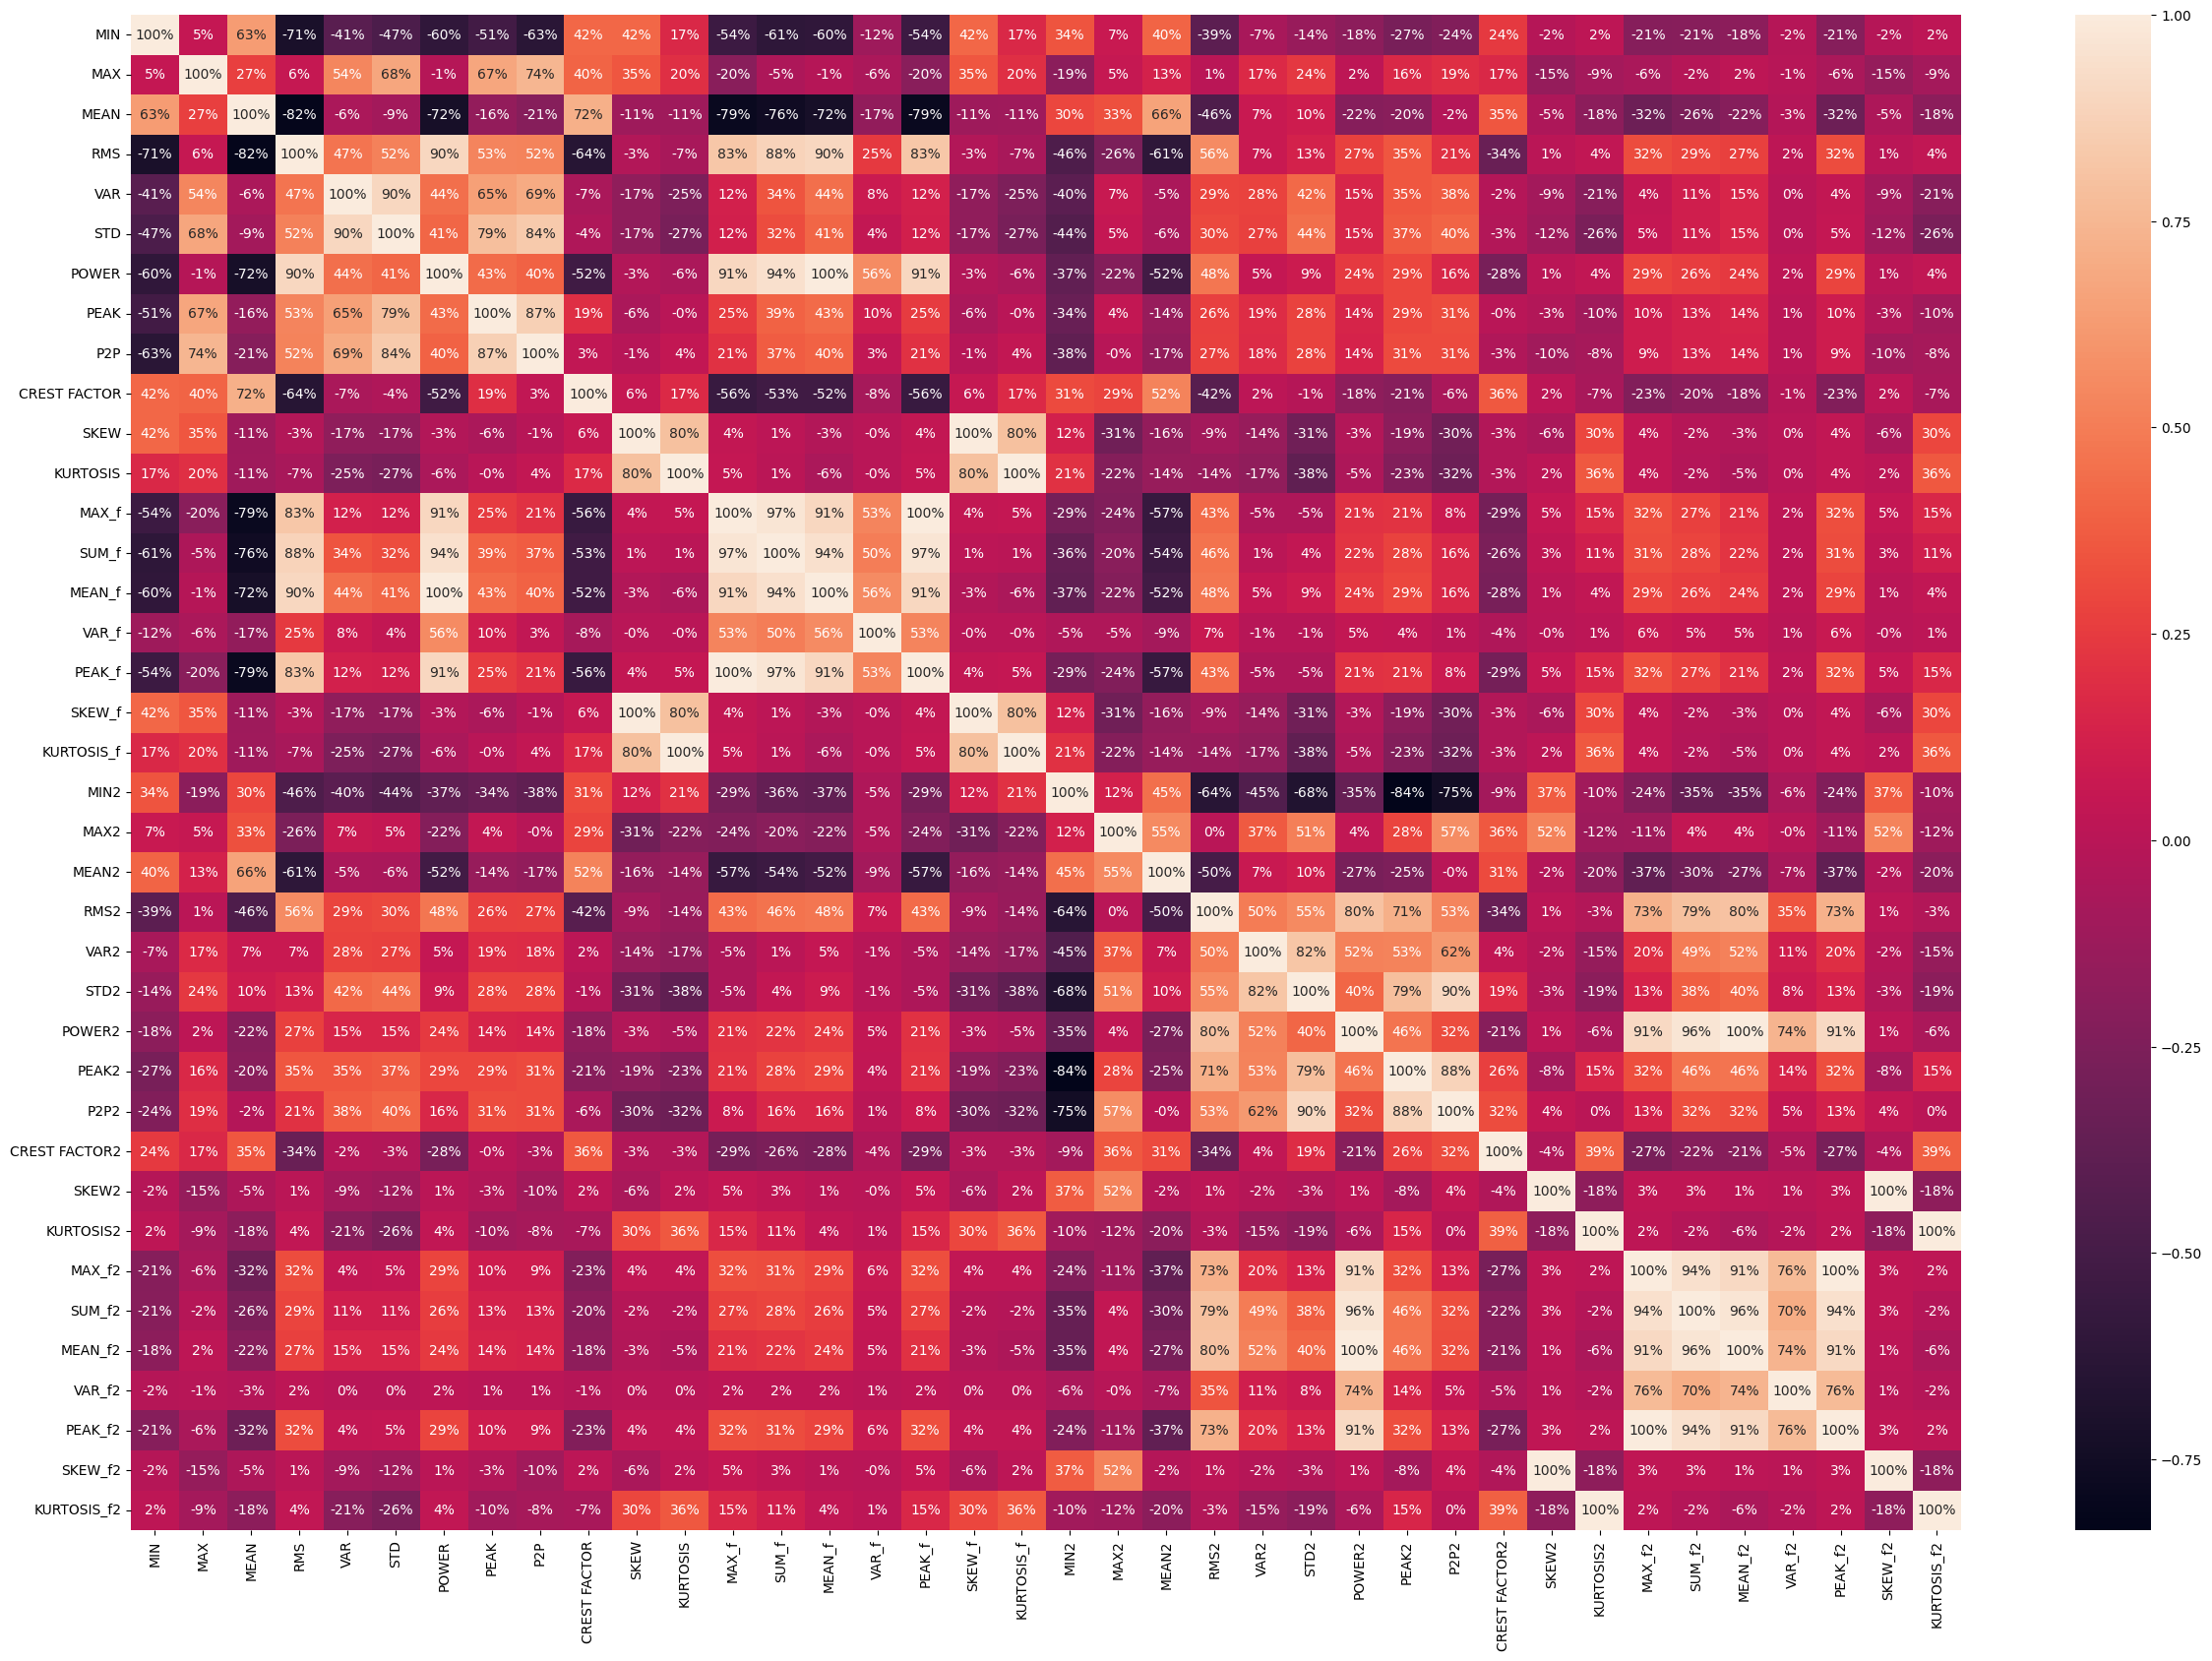

In [27]:
correlationMatrix=features.corr()
fig, ax=plt.subplots()
fig.set_size_inches(30,20)
# sns.heatmap(correlationMatrix,annot=True,cmap=plt.cm.CMRmap)
sns.heatmap(correlationMatrix,annot=True,fmt=".0%")
plt.savefig("heatMap.png")

In [16]:
# with the following function we can select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
correlatedFeatures=correlation(features,0.9)
len(correlatedFeatures)

15

In [18]:
correlatedFeatures
#after looking to the correlated features we realized that from the heat map that
#  there's no correlation between the features and each others

{'KURTOSIS_f',
 'KURTOSIS_f2',
 'MAX_f',
 'MAX_f2',
 'MEAN_f',
 'MEAN_f2',
 'P2P2',
 'PEAK_f',
 'PEAK_f2',
 'POWER',
 'SKEW_f',
 'SKEW_f2',
 'STD',
 'SUM_f',
 'SUM_f2'}

In [19]:
selectedFeatures=multiselectedFeatures.drop(correlatedFeatures,axis=1)
selectedFeatures

,MIN,MAX,MEAN,RMS,VAR,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,...,RMS2,VAR2,STD2,POWER2,PEAK2,CREST FACTOR2,SKEW2,KURTOSIS2,VAR_f2,arrhytmia
0,-0.485,0.780,-0.225085,0.311210,0.046189,0.780,1.265,2.506346,3.074325,10.443485,...,0.193244,0.033085,0.181893,0.037343,0.580,3.001388,2.229329,4.541907,0.006220,N
1,-0.535,0.875,-0.287321,0.328626,0.025442,0.875,1.410,2.662598,5.357950,31.927254,...,0.217213,0.009123,0.095516,0.047182,0.495,2.278867,4.390390,25.940657,0.422811,N
2,-0.570,0.940,-0.332586,0.373395,0.028811,0.940,1.510,2.517442,5.195860,31.453586,...,0.263620,0.016390,0.128025,0.069495,0.705,2.674306,3.854563,22.465985,0.820723,N
3,-0.645,0.960,-0.344665,0.385523,0.029833,0.960,1.605,2.490126,5.300222,32.825849,...,0.267289,0.017657,0.132879,0.071443,0.655,2.450534,4.060978,22.115247,0.819144,N
4,-0.565,0.860,-0.322140,0.361479,0.026893,0.860,1.425,2.379114,5.270049,31.195586,...,0.257889,0.011059,0.105160,0.066506,0.545,2.113316,4.348770,25.013723,0.872739,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101111,-0.435,1.615,-0.187905,0.369002,0.100854,1.615,2.050,4.376675,4.134956,18.226935,...,0.143982,0.013830,0.117602,0.020731,0.775,5.382605,3.469099,16.323332,0.012764,N
101112,-0.365,1.725,-0.167407,0.361284,0.102501,1.725,2.090,4.774637,4.443616,20.285046,...,0.133370,0.011519,0.107325,0.017788,0.655,4.911136,2.273350,9.430717,0.010974,N
101113,-0.410,1.680,-0.224365,0.367100,0.084423,1.680,2.090,4.576412,4.656214,22.853097,...,0.119058,0.009267,0.096263,0.014175,0.645,5.417510,3.096847,14.943577,0.006681,N
101114,-0.430,1.540,-0.199652,0.357333,0.087826,1.540,1.970,4.309710,4.267919,19.429201,...,0.115790,0.012239,0.110630,0.013407,0.710,6.131778,3.398698,16.723278,0.001584,N


In [ ]:
# selectedFeatures.to_csv("selectedFeatures.csv",index=False)